In [2]:
import sys
sys.path.append('../training_performance')

import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

from plot_trials_info import *
from plot_days_info import *

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2024-01-25 14:47:22,263][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-01-25 14:47:22,657][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [6]:
cohort3 = [
    "R030",
    "R031",
    "R032",
    "R033",
    "R034",
    "R035",
    "R036",
    "R037",
    "R038",
    "R039",
]

c3df = create_trials_df_from_dj(
    cohort3,
)

fetched 20 sessions for R030 between 2024-01-03 and 2024-01-24
fetched 21 sessions for R031 between 2024-01-03 and 2024-01-24
Not all variables are the same length. Cannot create proper DataFrame
result: 148
hits: 148
violations: 148
temperror: 148
hit_rate: 147
error_rate: 147
violation_rate: 147
temp_error_rate: 147
n_lpokes: 147
n_cpokes: 147
n_rpokes: 147
trial_dur: 147
trial_start: 147
valid_early_spoke: 147
first_spoke: 147
first_lpoke: 147
first_rpoke: 147
n_settling_ins: 147
avg_settling_in: 147
cpoke_dur: 147
wf_cpoke_dur: 147
n_incorr_spokes_during_give_del: 147
stage: 147
curriculum: 147
sides: 148
SMA_set: 147
is_match: 148
sa: 147
sb: 147
stimuli_on: 147
settling_in_dur: 147
legal_cbreak_dur: 147
pre_dur: 147
adj_pre_dur: 147
stimulus_dur: 147
delay_dur: 147
post_dur: 147
sb_extra_dur: 147
viol_off_dur: 147
pre_go_dur: 147
inter_trial_dur: 147
go_type: 147
go_dur: 147
give_type_set: 147
give_type_imp: 147
give_frac: 147
give_delay_dur: 147
give_xtra_light_delay_dur: 147
gi

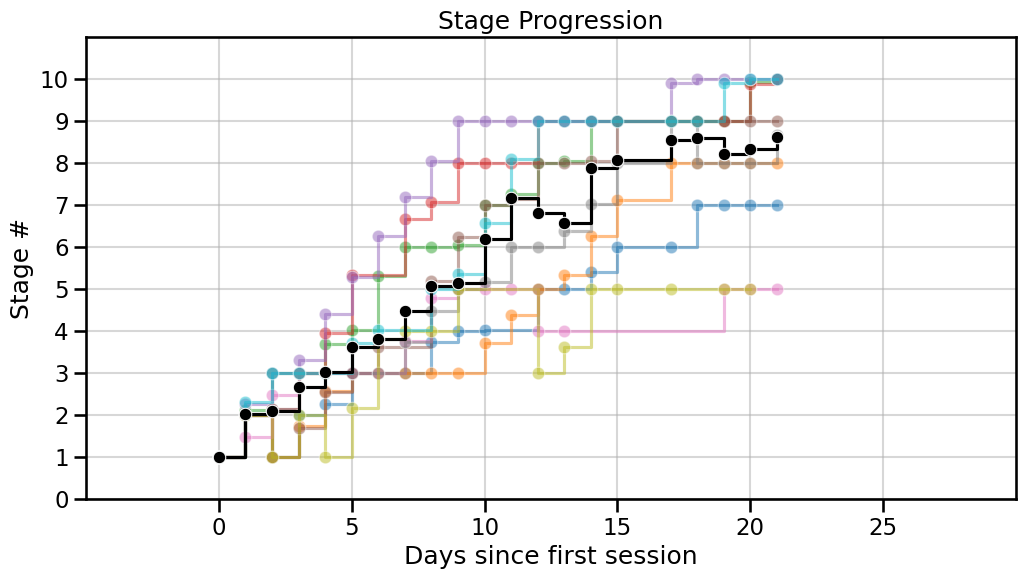

In [15]:
c3df["date"] = pd.to_datetime(c3df["date"], format="%Y-%m-%d")
c3df["start_date"] = c3df.groupby("animal_id")["date"].transform(
    lambda x: (x - x.min()).dt.days
)

fig, ax = plt.subplots(figsize=(12, 6))
for animal_id, sub_df in c3df.groupby("animal_id"):
    plot_stage(
        sub_df,
        ax=ax,
        group="start_date",
        aesthetics=False,
        # color=get_species_color(sub_df.species.iloc[0]),
        alpha=0.5,
        label=None,
    )


# for species, sub_df in trials_df.groupby("species"):
plot_stage(
    c3df,
    ax=ax,
    group="start_date",
    aesthetics=False,
    color="black",
    # label=species,
)

max_stage = int(c3df.stage.max())
ax.grid(alpha=0.5)
_ = ax.set(
    ylabel="Stage #",
    title="Stage Progression",
    ylim=(0, max_stage + 1),
    yticks=range(max_stage + 1),
    xlabel="Days since first session",
    xlim=(-5, 30),
    xticks=np.arange(stop=30, step=5),
)

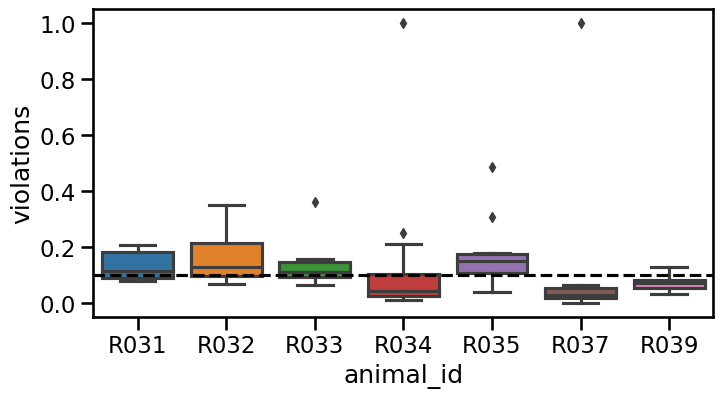

In [32]:
violation_df = c3df.query("stage >= 8").copy()

session_avg_violations = (
    violation_df.groupby(["animal_id", "sess_id"]).violations.mean().reset_index()
)

fig, ax = pu.make_fig((8, 4))
sns.boxplot(data=session_avg_violations, x="animal_id", y="violations", ax=ax)
ax.axhline(violation_df.violations.mean(), ls="--", color="black")

### Anti light guide animals

In [25]:
alg = ["R014", "R011", "R027", "C222", "R015", "R029"]

trials_df = create_trials_df_from_dj(alg, date_min="2024-01-05")

fetched 20 sessions for R014 between 2024-01-05 and 2024-01-25
fetched 20 sessions for R011 between 2024-01-05 and 2024-01-25
fetched 18 sessions for R027 between 2024-01-05 and 2024-01-25
fetched 19 sessions for C222 between 2024-01-05 and 2024-01-24
fetched 20 sessions for R015 between 2024-01-05 and 2024-01-25
fetched 17 sessions for R029 between 2024-01-05 and 2024-01-25


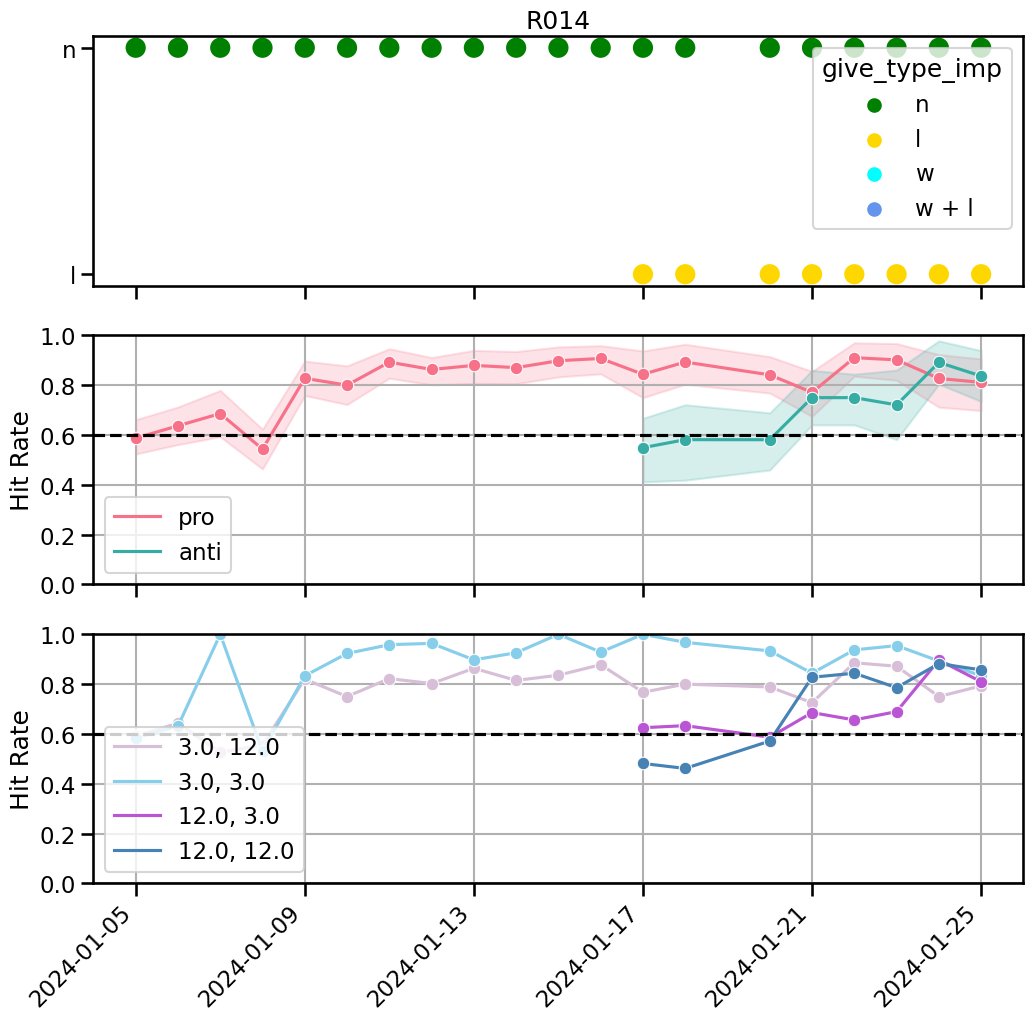

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(12, 11), sharex=True)

plot_give_info_days(
    trials_df.query("animal_id == 'R014'"),
    aesthetics=False,
    title="R014",
    ax=ax[0],
)
plot_stim_performance_by_pro_anti(
    trials_df.query("animal_id == 'R014'"),
    ax=ax[1],
    aesthetics=False,
)
plot_stim_performance(
    trials_df.query("animal_id == 'R014'"),
    ax=ax[2],
    aesthetics=True,
)

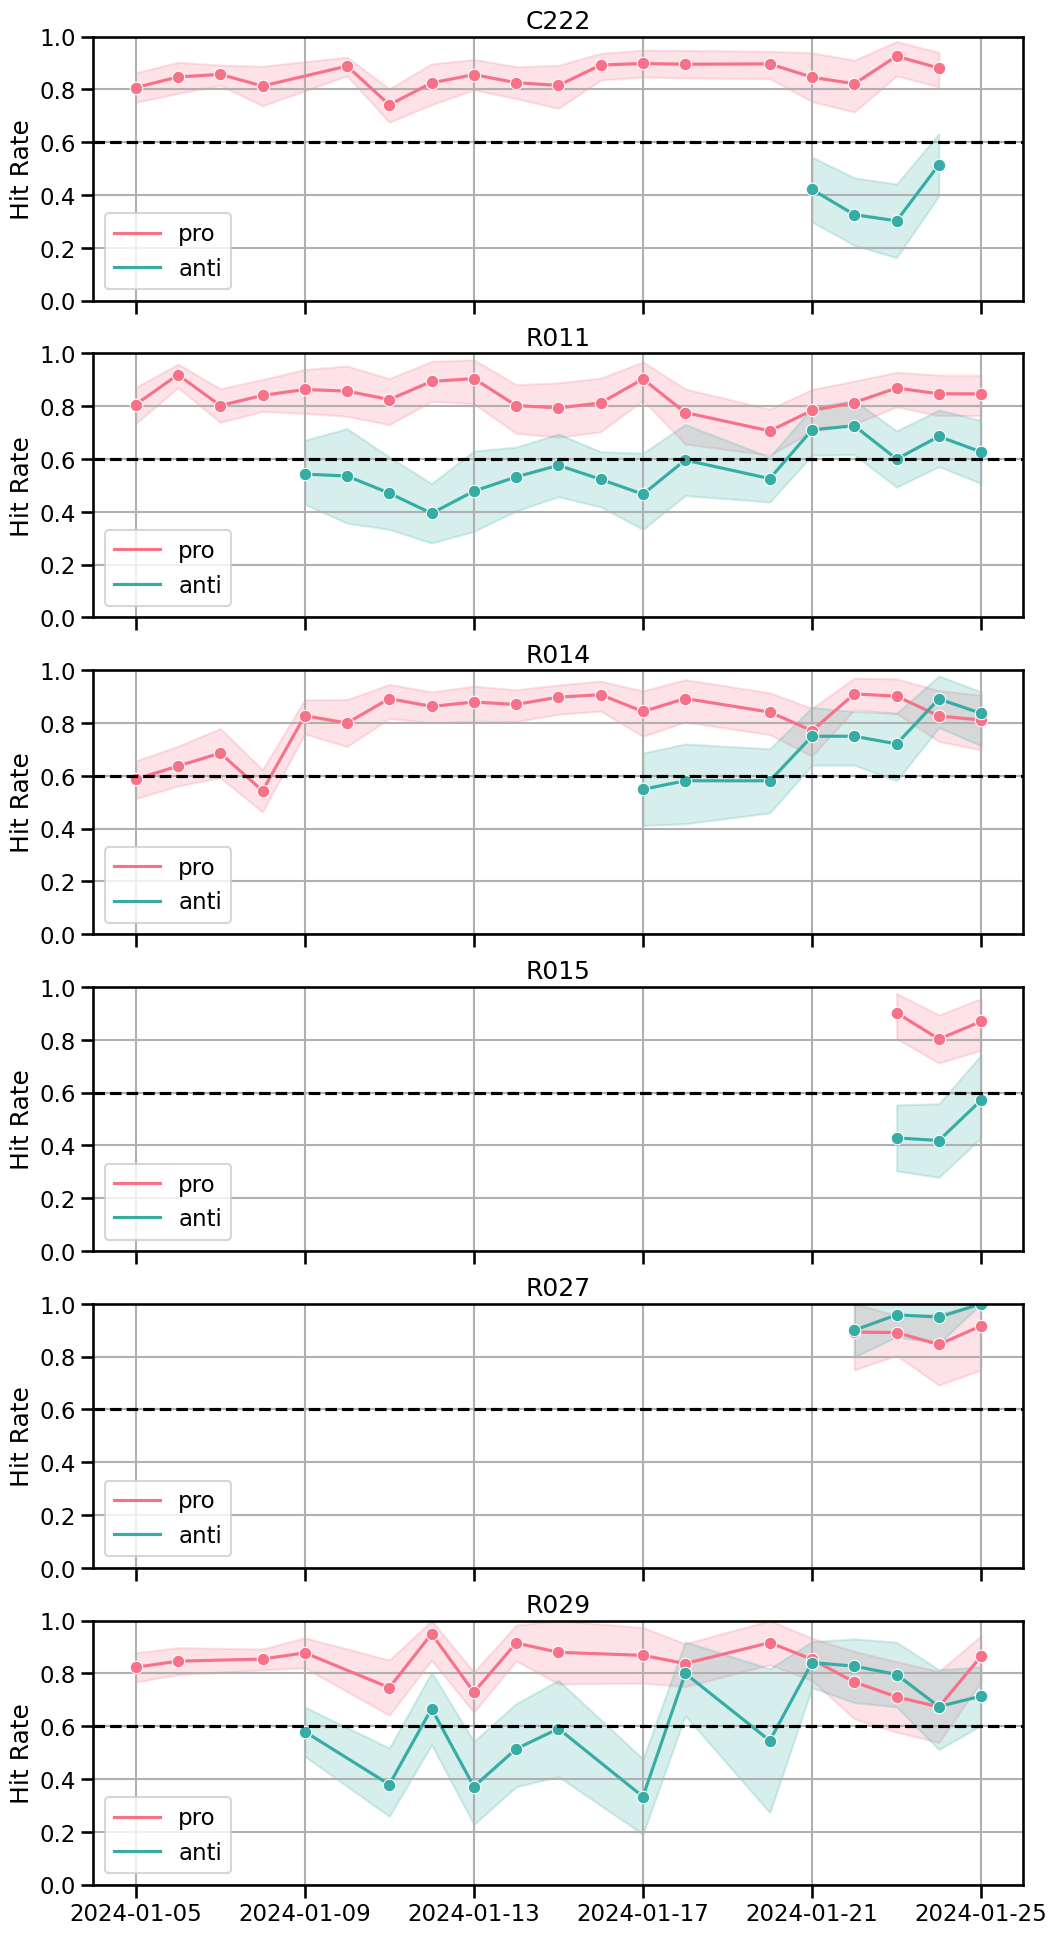

In [27]:
fig, ax = plt.subplots(len(alg), 1, figsize=(12, 4 * len(alg)), sharex=True)

for ii, (animal_id, sub_df) in enumerate(trials_df.groupby("animal_id")):
    plot_stim_performance_by_pro_anti(
        sub_df,
        ax=ax[ii],
        aesthetics=False,
        title=animal_id,
    )

### Give delay dur

In [28]:
aniamls = ["R010", "R023"]

trials_df = create_trials_df_from_dj(aniamls, date_min="2024-01-05")

fetched 20 sessions for R010 between 2024-01-05 and 2024-01-25
fetched 18 sessions for R023 between 2024-01-05 and 2024-01-25


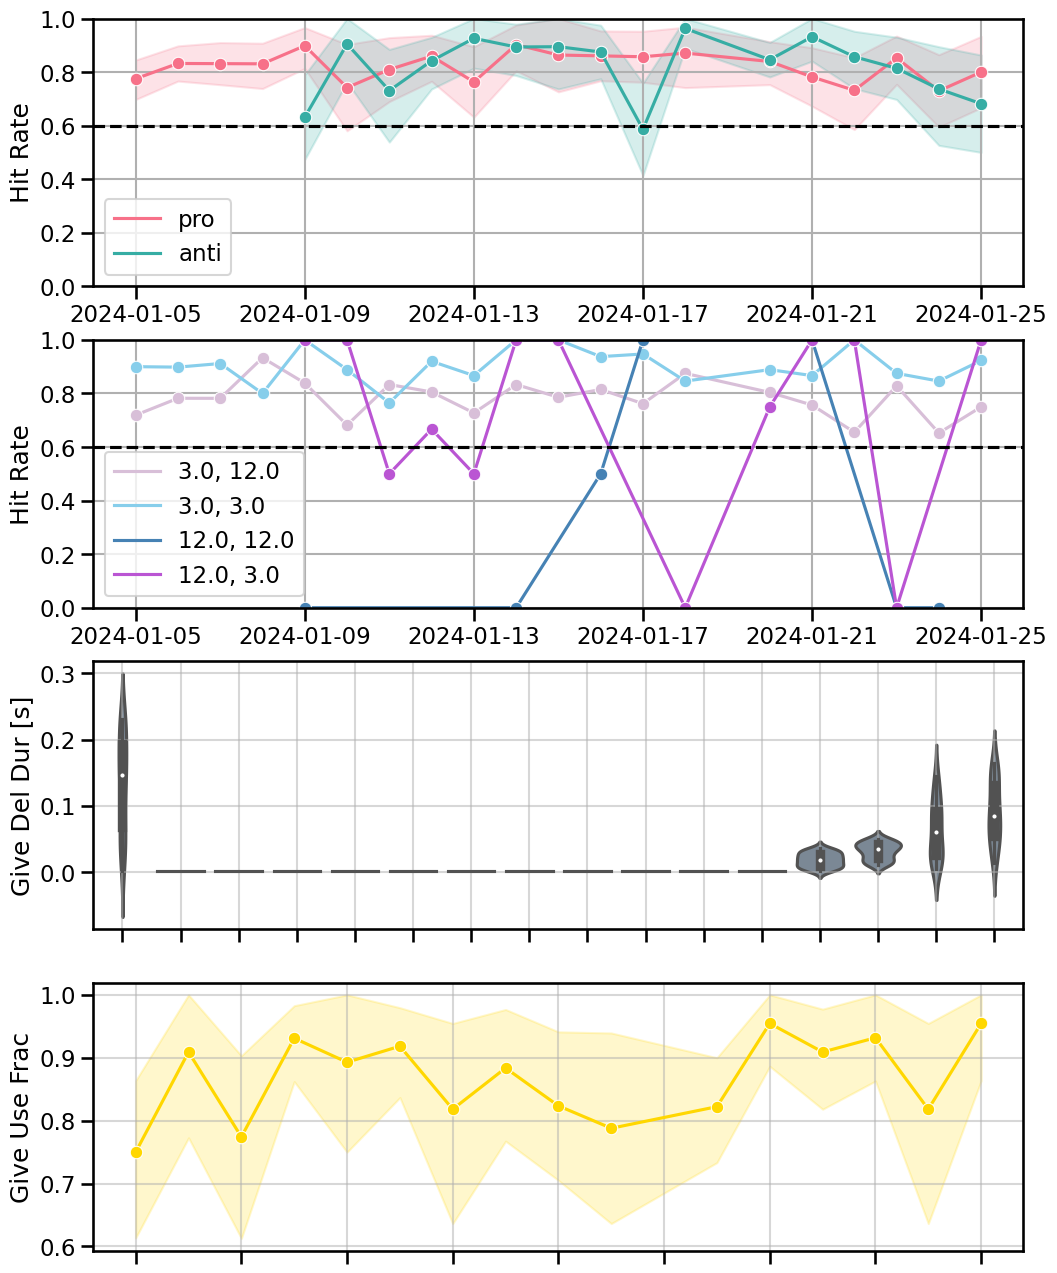

In [41]:
fig, ax = plt.subplots(4, 1, figsize=(12, 4 * 4))
animal = "R010"
plot_stim_performance_by_pro_anti(
    trials_df.query("animal_id == @animal"), aesthetics=False, ax=ax[0]
)
plot_non_give_stim_performance(
    trials_df.query("animal_id == @animal"), aesthetics=False, ax=ax[1]
)
plot_give_delay_dur_days(trials_df.query("animal_id == @animal"), ax=ax[2])
plot_give_use_rate_days(trials_df.query("animal_id == @animal"), ax[3])

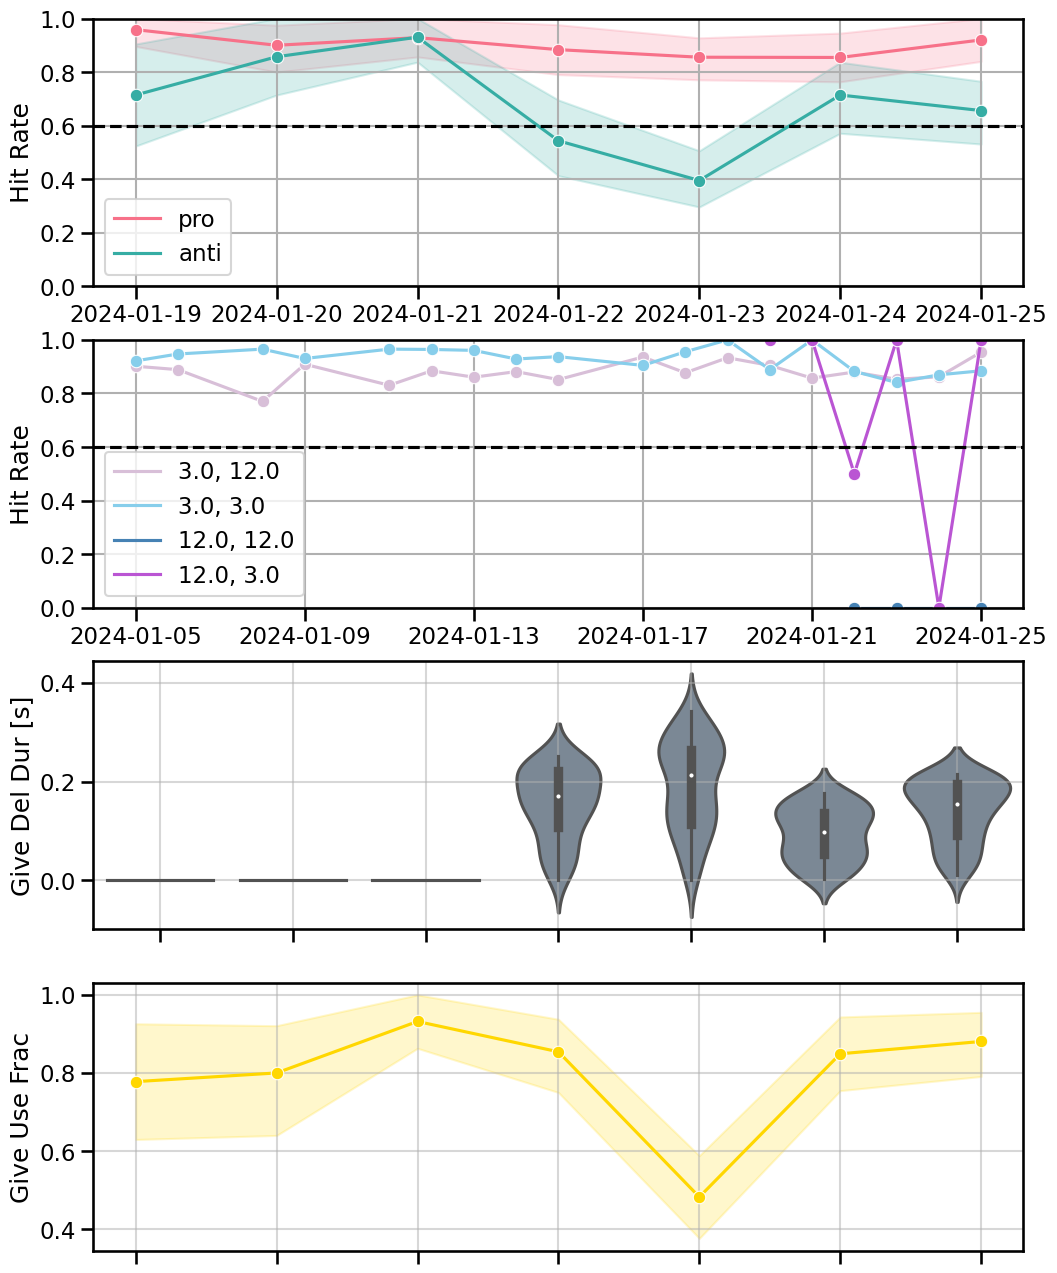

In [42]:
fig, ax = plt.subplots(4, 1, figsize=(12, 4 * 4))
animal = "R023"
plot_stim_performance_by_pro_anti(
    trials_df.query("animal_id == @animal"), aesthetics=False, ax=ax[0]
)
plot_non_give_stim_performance(
    trials_df.query("animal_id == @animal"), aesthetics=False, ax=ax[1]
)
plot_give_delay_dur_days(trials_df.query("animal_id == @animal"), ax=ax[2])
plot_give_use_rate_days(trials_df.query("animal_id == @animal"), ax[3])

### R023 daily plots

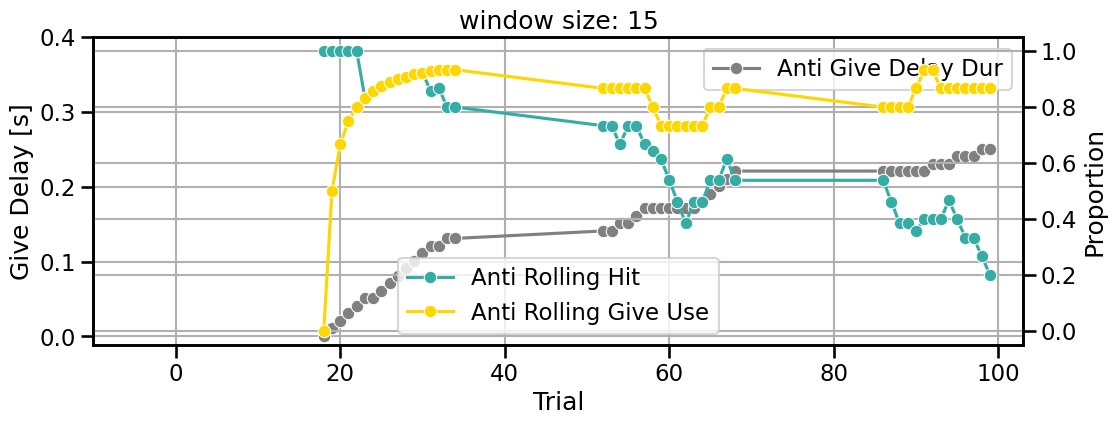

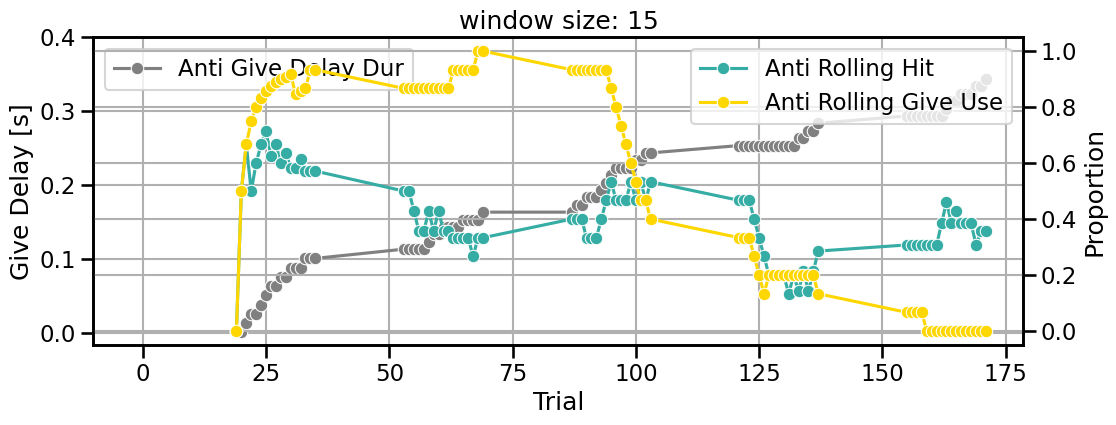

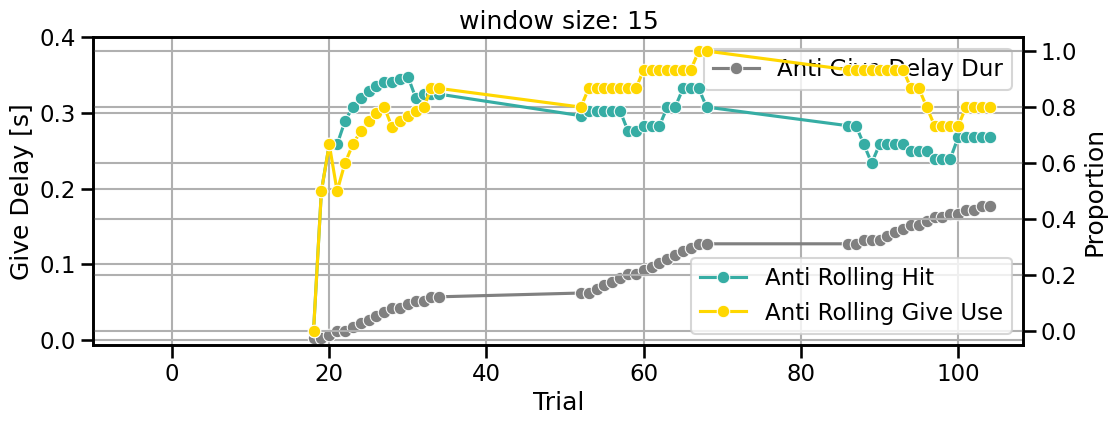

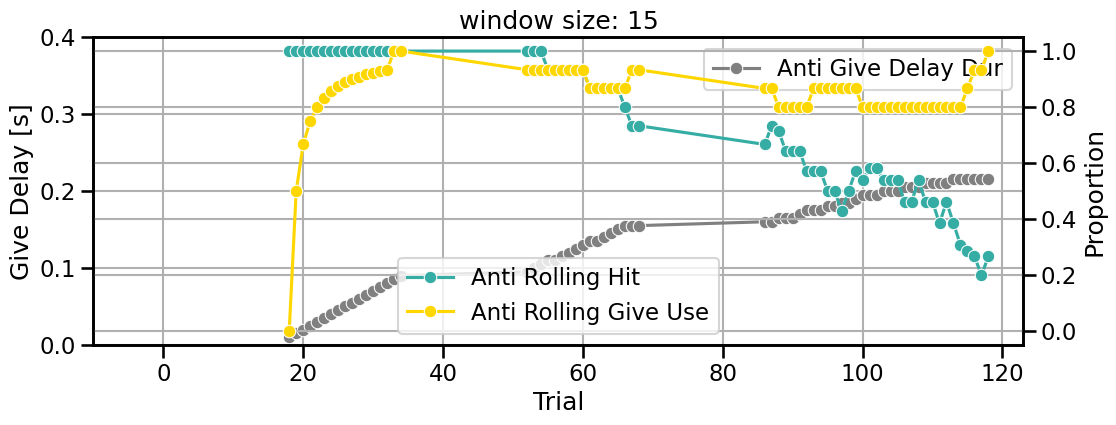

In [56]:
date_min = pd.Timestamp(2024, 1, 21).date()

for idx, (date, sub_df) in enumerate(
    trials_df.query("date > @date_min and animal_id =='R023'").groupby("date")
):
    plot_anti_give_del_metrics(sub_df)